# Explore the head direction cell dataset


### Table of contents

1. [**Synthetic population**](#synthetic)
3. [**SNN**](#snn)
4. [**RNN**](#rnn)

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import pickle

import neuroprob as nprb
import neuroprob.utils as utils

import select_th1_units

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Mutual information 

$$I(x;\text{spike}) = \int p(x) \, \lambda(x) \, \log{\frac{\lambda(x)}{\langle \lambda \rangle}} \, \mathrm{d}x,$$

Sparsity 

$$ S = $$

Coherence 

$$ C = $$

In [55]:
datadir = '/scratches/ramanujan_2/dl543/preprocessed/th1/'
data_dict = pickle.load(open(datadir+'/th1_Mouse28_140313_wake.p', 'rb'))

tbin, resamples, rcnts_t, rx_t, ry_t, rhd_t = select_th1_units.resample_valids(
    data_dict, bin_size=20)  # original data at 20k Hz
sm_tun, hd_MI, coherence, sparsity = select_th1_units.histogram_analysis(
    tbin, rcnts_t, rhd_t, bins_hd=60, filter_win=41, sigma_smooth=6)

refract_viol = data_dict["neural"]["refract_viol"]

invalid time intervals:  {'HD': [{'index': 0, 'length': 2305}, {'index': 12911873, 'length': 4607}, {'index': 16398593, 'length': 4095}, {'index': 16641793, 'length': 4608}, {'index': 23823617, 'length': 9215}, {'index': 27351808, 'length': 3072}, {'index': 31137024, 'length': 4609}, {'index': 35775233, 'length': 3072}, {'index': 36065537, 'length': 3584}, {'index': 37027072, 'length': 4608}], 'XY': [{'index': 0, 'length': 2305}]}


In [56]:
units = data_dict['neural']['units']
neuron_groups = data_dict['neural']['neuron_groups']
        
neuron_regions = np.empty(units)
for key in neuron_groups.keys():
    neuron_regions[neuron_groups[key]] = select_th1_units.brain_regions[key]

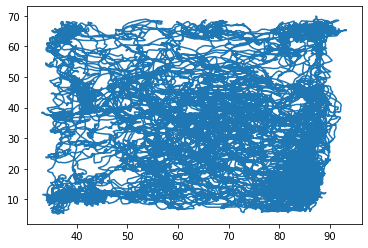

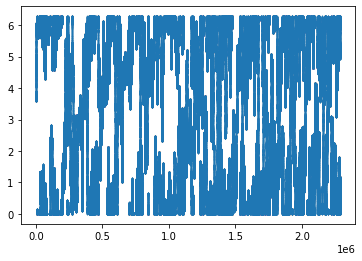

In [57]:
plt.plot(rx_t, ry_t)
plt.show()

plt.scatter(np.arange(resamples), rhd_t[:] % (2*np.pi), s=1, marker='.')
plt.show()

In [58]:
hdc_unit = np.zeros(units).astype(bool)
for u in range(units):
    if (hd_MI[u] > 0.5 and sparsity[u] > 0.2 and refract_viol[u] < 2.0):
        hdc_unit[u] = True
        
unit_used = np.where(hdc_unit)[0]
print(len(unit_used))

33


In [59]:
unit_used

array([ 7,  9, 11, 12, 20, 21, 22, 24, 26, 27, 28, 30, 31, 45, 52, 55, 56,
       57, 58, 60, 61, 62, 63, 64, 67, 68, 70, 71, 72, 73, 75, 76, 77])

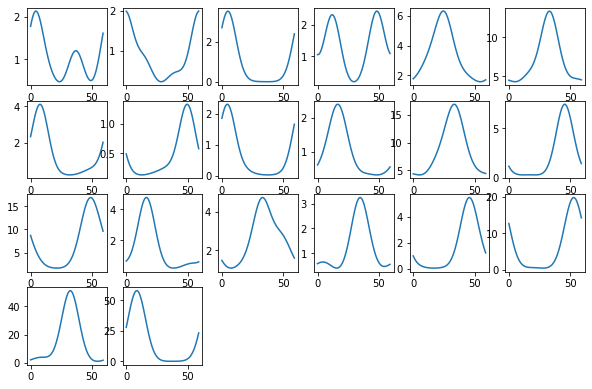

In [60]:
plt.figure(figsize=(10, 10))

for i in range(20):
    u = unit_used[i]
    
    plt.subplot(6, 6, i+1)
    plt.plot(sm_tun[u])

plt.show()

In [85]:
# Mouse28
left_over = np.delete(np.arange(units), unit_used)
print(np.where(left_over > max(neuron_groups['PoS']))[0])

edge = np.array([38])

[38 39 40 41 42 43 44 45 46 47 48]


In [54]:
len(np.where(np.load('../' + 'Mouse28_140313_wake.npz')["hdc_unit"])[0])

33